# Reading EBAS NILU data from particle size distribution from Zeppelin 2000-2007

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyaerocom as pya
import glob

/opt/conda/lib/python3.7/site-packages/geonum/__init__.py:39: UserWarning: Plotting of maps etc. is deactivated, please install Basemap
  warn('Plotting of maps etc. is deactivated, please install Basemap')


In [2]:
ls EBAS_FILES/

NO0042G.20000301000000.20170523000000.dmps.particle_number_size_distribution.aerosol.10mo.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nas
NO0042G.20010101000000.20170523103005.dmps.particle_number_size_distribution.aerosol.1y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nas
NO0042G.20020101000000.20170523103005.dmps.particle_number_size_distribution.aerosol.1y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nas
NO0042G.20030101000000.20170523103005.dmps.particle_number_size_distribution.aerosol.1y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nas
NO0042G.20040101000000.20170523103005.dmps.particle_number_size_distribution.aerosol.9mo.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nas
NO0042G.20050101000000.20170523103005.dmps.particle_number_size_distribution.aerosol.1y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nas
NO0042G.20060101000000.20170523103005.dmps.particle_number_size_distribution.aerosol.1y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nas
NO0042G.20070101000000.20170523103005.dmps.particle_number_size_distribution.aerosol.1y.1h.NO01L_dmps_no42.N

In [3]:
fpath1 = 'EBAS_FILES/'+'NO0042G.20000301000000.20170523000000.dmps.particle_number_size_distribution.aerosol.10mo.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nas'

In [4]:
filedata1 = pya.io.EbasNasaAmesFile(fpath1)
#print(filedata1)
filedata1.to_dataframe()

,starttime_days,endtime_days,particle_number_size_distribution_1/cm3,numflag particle_number_size_distribution_no unit,particle_number_size_distribution_1/cm3(Col4),numflag particle_number_size_distribution_no unit(Col5),particle_number_size_distribution_1/cm3(Col6),numflag particle_number_size_distribution_no unit(Col7),particle_number_size_distribution_1/cm3(Col8),numflag particle_number_size_distribution_no unit(Col9),...,particle_number_size_distribution_1/cm3(Col24),numflag particle_number_size_distribution_no unit(Col25),particle_number_size_distribution_1/cm3(Col26),numflag particle_number_size_distribution_no unit(Col27),particle_number_size_distribution_1/cm3(Col28),numflag particle_number_size_distribution_no unit(Col29),particle_number_size_distribution_1/cm3(Col30),numflag particle_number_size_distribution_no unit(Col31),particle_number_size_distribution_1/cm3(Col32),numflag particle_number_size_distribution_no unit(Col33)
2000-03-01 00:30:00,60.000000,60.041667,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999,...,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999
2000-03-01 01:29:59,60.041667,60.083333,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999,...,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999
2000-03-01 02:29:59,60.083333,60.125000,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999,...,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999
2000-03-01 03:30:00,60.125000,60.166667,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999,...,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999
2000-03-01 04:29:59,60.166667,60.208333,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999,...,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999,NaN,0.999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-12-31 19:29:59,365.791667,365.833333,8.13,0.000,6.20,0.000,6.03,0.000,7.18,0.000,...,8.88,0.000,4.68,0.000,1.80,0.000,0.01,0.000,0.19,0.000
2000-12-31 20:29:59,365.833333,365.875000,9.54,0.000,7.63,0.000,6.90,0.000,8.02,0.000,...,8.76,0.000,4.56,0.000,1.78,0.000,0.01,0.000,0.17,0.000
2000-12-31 21:30:00,365.875000,365.916667,9.95,0.000,8.40,0.000,7.06,0.000,7.73,0.000,...,8.38,0.000,4.17,0.000,1.86,0.000,0.02,0.000,0.21,0.000
2000-12-31 22:29:59,365.916667,365.958333,10.66,0.000,9.76,0.000,9.44,0.000,10.67,0.000,...,8.69,0.000,4.28,0.000,1.73,0.000,0.01,0.000,0.16,0.000


In [5]:
from tuuli_functions import size_dist_to_xarray
da = size_dist_to_xarray(filedata1)
da

<xarray.DataArray 'sized' (time: 7344, d_index: 16)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [9.950e+00, 8.400e+00, 7.060e+00, ..., 1.860e+00, 2.000e-02,
        2.100e-01],
       [1.066e+01, 9.760e+00, 9.440e+00, ..., 1.730e+00, 1.000e-02,
        1.600e-01],
       [1.272e+01, 1.071e+01, 1.207e+01, ..., 1.970e+00, 1.000e-02,
        1.600e-01]])
Coordinates:
  * time     (time) datetime64[ns] 2000-03-01T00:30:00 ... 2000-12-31T23:29:59
Dimensions without coordinates: d_index

In [6]:
arrs1 = []
for filepath1 in glob.glob('EBAS_FILES/*.nas'):
    filedata1 = pya.io.EbasNasaAmesFile(filepath1)
    arrs1.append(size_dist_to_xarray(filedata1))    

In [7]:
arr1 = arrs1[0]
for array1 in arrs1[1:]:
    arr1 = xr.concat([arr1, array1], dim='time')
arr1

<xarray.DataArray 'sized' (time: 66476, d_index: 16)>
array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [31.2 , 23.33, 13.83, ...,  4.78,  1.32,  0.73],
       [26.32, 21.36, 14.71, ...,  4.65,  1.26,  0.66],
       [29.99, 24.96, 18.97, ...,  5.16,  1.59,  0.77]])
Coordinates:
  * time     (time) datetime64[ns] 2003-01-01T00:30:00 ... 2001-12-31T23:29:59
Dimensions without coordinates: d_index

In [8]:
df1 = arr1.to_dataframe().unstack('d_index')
cols = [x[1] for x in df1.columns.values]
cols

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [9]:
df1

sized                                                 \
d_index                 0       1       2       3       4       5      6    
time                                                                        
2000-03-01 00:30:00    NaN     NaN     NaN     NaN     NaN     NaN    NaN   
2000-03-01 01:29:59    NaN     NaN     NaN     NaN     NaN     NaN    NaN   
2000-03-01 02:29:59    NaN     NaN     NaN     NaN     NaN     NaN    NaN   
2000-03-01 03:30:00    NaN     NaN     NaN     NaN     NaN     NaN    NaN   
2000-03-01 04:29:59    NaN     NaN     NaN     NaN     NaN     NaN    NaN   
...                    ...     ...     ...     ...     ...     ...    ...   
2007-12-31 15:30:00  4.958  14.200  20.537  24.471  22.501  16.750  4.182   
2007-12-31 16:29:59  4.688  10.021  14.746  12.179  10.315   8.210  3.798   
2007-12-31 17:29:59  7.266  10.576  14.441  10.248   8.889  10.308  5.864   
2007-12-31 18:30:00  7.892  12.804  15.037   8.838   7.312   9.770  8.556   
2007-12-31 19:29:59  5.742  11.307   9.952   8.594   6.088   7.921  9.504   

                                                                          \
d_index                  7        8        9        10       11       12   
time                                                                       
2000-03-01 00:30:00     NaN      NaN      NaN      NaN      NaN      NaN   
2000-03-01 01:29:59     NaN      NaN      NaN      NaN      NaN      NaN   
2000-03-01 02:29:59     NaN      NaN      NaN      NaN      NaN      NaN   
2000-03-01 03:30:00     NaN      NaN      NaN      NaN      NaN      NaN   
2000-03-01 04:29:59     NaN      NaN      NaN      NaN      NaN      NaN   
...                     ...      ...      ...      ...      ...      ...   
2007-12-31 15:30:00  40.393  102.763  111.944  222.571  338.681  278.639   
2007-12-31 16:29:59  25.886   81.899   94.067  139.271  258.607  242.999   
2007-12-31 17:29:59  23.588   76.466   82.557  117.913  218.508  199.819   
2007-12-31 18:30:00  19.815   56.377   84.023  118.488  181.814  156.749   
2007-12-31 19:29:59  22.548   44.201   75.584  102.905  138.561  115.784   

                                            
d_index                  13      14     15  
time                                        
2000-03-01 00:30:00     NaN     NaN    NaN  
2000-03-01 01:29:59     NaN     NaN    NaN  
2000-03-01 02:29:59     NaN     NaN    NaN  
2000-03-01 03:30:00     NaN     NaN    NaN  
2000-03-01 04:29:59     NaN     NaN    NaN  
...                     ...     ...    ...  
2007-12-31 15:30:00  83.562  22.982  8.954  
2007-12-31 16:29:59  92.119  20.605  8.736  
2007-12-31 17:29:59  88.872  19.124  5.580  
2007-12-31 18:30:00  76.435  18.742  6.469  
2007-12-31 19:29:59  62.180  16.677  3.966  

[66476 rows x 16 columns]

In [10]:
coords = {'time' : df1.index.values,
          'size' : cols}
    
dims = ['time', 'size']
xr.DataArray(df1.values, dims=dims, coords=coords)

<xarray.DataArray (time: 66476, size: 16)>
array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [ 7.266, 10.576, 14.441, ..., 88.872, 19.124,  5.58 ],
       [ 7.892, 12.804, 15.037, ..., 76.435, 18.742,  6.469],
       [ 5.742, 11.307,  9.952, ..., 62.18 , 16.677,  3.966]])
Coordinates:
  * time     (time) datetime64[ns] 2000-03-01T00:30:00 ... 2007-12-31T19:29:59
  * size     (size) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15

In [11]:
#dts = xr.DataArray(df1.values, dims=dims, coords=coords)
#dts.plot();

In [12]:
df1_turned = df1.T.loc['sized']
df1_turned

time,2000-03-01 00:30:00,2000-03-01 01:29:59,2000-03-01 02:29:59,2000-03-01 03:30:00,2000-03-01 04:29:59,2000-03-01 05:29:59,2000-03-01 06:30:00,2000-03-01 07:29:59,2000-03-01 08:29:59,2000-03-01 09:30:00,...,2007-12-31 10:29:59,2007-12-31 11:29:59,2007-12-31 12:30:00,2007-12-31 13:29:59,2007-12-31 14:29:59,2007-12-31 15:30:00,2007-12-31 16:29:59,2007-12-31 17:29:59,2007-12-31 18:30:00,2007-12-31 19:29:59
d_index,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.603,4.250,4.167,6.927,6.968,4.958,4.688,7.266,7.892,5.742
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.823,11.494,12.309,14.920,12.394,14.200,10.021,10.576,12.804,11.307
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.100,20.140,22.269,19.143,23.866,20.537,14.746,14.441,15.037,9.952
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.930,25.389,22.474,23.263,29.415,24.471,12.179,10.248,8.838,8.594
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.552,19.522,19.244,19.421,27.255,22.501,10.315,8.889,7.312,6.088
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.465,11.581,12.518,15.400,22.756,16.750,8.210,10.308,9.770,7.921
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.506,0.430,2.342,7.465,8.712,4.182,3.798,5.864,8.556,9.504
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.067,31.108,36.951,39.527,40.734,40.393,25.886,23.588,19.815,22.548
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.468,91.299,95.054,96.922,96.100,102.763,81.899,76.466,56.377,44.201


In [13]:
df_sizes_20_50_2000_2007 = df1_turned.loc[1:5,'2000-03-01 00:30:00':'2007-12-31 19:29:59'].T

Ntot_20_50_2000_2007 = pd.Series(np.trapz(df_sizes_20_50_2000_2007,
x = np.log10(df_sizes_20_50_2000_2007.columns)),
index=df_sizes_20_50_2000_2007.index.copy())

Ntot_20_50_2000_2007

time
2000-03-01 00:30:00          NaN
2000-03-01 01:29:59          NaN
2000-03-01 02:29:59          NaN
2000-03-01 03:30:00          NaN
2000-03-01 04:29:59          NaN
                         ...    
2007-12-31 15:30:00    14.027416
2007-12-31 16:29:59     8.401248
2007-12-31 17:29:59     8.064859
2007-12-31 18:30:00     8.129166
2007-12-31 19:29:59     6.428674
Length: 66476, dtype: float64

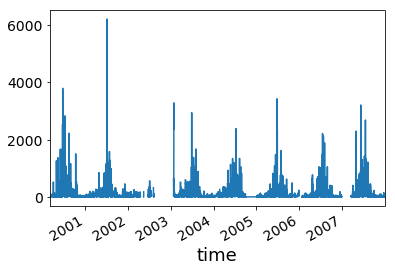

In [14]:
Ntot_20_50_2000_2007.plot()

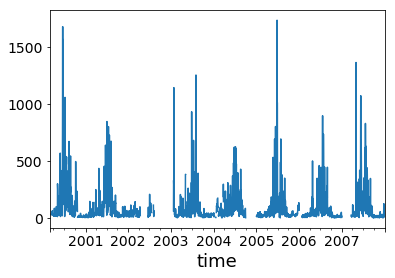

In [15]:
Ntot_20_50_2000_2007.resample('D').mean().plot()

## Reading EBAS NILU data from particle size distribution from Zeppelin 2008-2009


In [16]:
ls ebasfiles_S03l/

NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.1y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nas
NO0042G.20090101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.1y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nas


In [17]:
fpath2 = 'ebasfiles_S03l/'+'NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.1y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nas'

In [18]:
filedata2 = pya.io.EbasNasaAmesFile(fpath2)
#print(filedata2)
filedata2.to_dataframe()

,starttime_days,endtime_days,particle_number_size_distribution_1/cm3,particle_number_size_distribution_1/cm3(Col3),particle_number_size_distribution_1/cm3(Col4),particle_number_size_distribution_1/cm3(Col5),particle_number_size_distribution_1/cm3(Col6),particle_number_size_distribution_1/cm3(Col7),particle_number_size_distribution_1/cm3(Col8),particle_number_size_distribution_1/cm3(Col9),...,particle_number_size_distribution_1/cm3(Col13),particle_number_size_distribution_1/cm3(Col14),particle_number_size_distribution_1/cm3(Col15),particle_number_size_distribution_1/cm3(Col16),particle_number_size_distribution_1/cm3(Col17),particle_number_size_distribution_1/cm3(Col18),particle_number_size_distribution_1/cm3(Col19),particle_number_size_distribution_1/cm3(Col20),particle_number_size_distribution_1/cm3(Col21),numflag_no unit
2008-01-01 00:30:00,0.000000,0.041667,1.51,9.21,13.43,31.58,41.55,55.22,54.86,53.51,...,38.99,30.98,27.49,31.24,22.35,13.28,8.04,7.68,2.75,0.000000
2008-01-01 01:29:59,0.041667,0.083333,3.02,5.78,18.28,30.35,60.74,59.91,67.70,54.42,...,30.61,30.83,29.88,23.58,18.73,10.30,5.78,5.78,2.86,0.000000
2008-01-01 02:29:59,0.083333,0.125000,3.01,5.08,17.30,30.31,46.08,53.91,49.57,39.32,...,12.89,11.60,5.77,6.15,3.05,2.03,1.47,0.24,0.57,0.000000
2008-01-01 03:30:00,0.125000,0.166667,1.51,4.52,18.73,28.29,43.44,46.89,36.39,27.74,...,5.04,4.42,3.75,1.61,0.97,1.61,1.00,0.05,0.11,0.000000
2008-01-01 04:29:59,0.166667,0.208333,0.00,2.40,7.69,23.06,40.57,49.66,50.24,38.90,...,34.93,32.36,34.30,27.53,21.41,19.30,16.89,7.53,4.91,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-31 19:29:59,365.791667,365.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999247
2008-12-31 20:29:59,365.833333,365.875000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999247
2008-12-31 21:30:00,365.875000,365.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999000
2008-12-31 22:29:59,365.916667,365.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999247


In [19]:
from tuuli_functions import size_dist_to_xarray_n
da2 = size_dist_to_xarray_n(filedata2)
da2

<xarray.DataArray 'sized' (time: 8760, d_index: 20)>
array([[ 1.51,  9.21, 13.43, ...,  8.04,  7.68,  2.75],
       [ 3.02,  5.78, 18.28, ...,  5.78,  5.78,  2.86],
       [ 3.01,  5.08, 17.3 , ...,  1.47,  0.24,  0.57],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])
Coordinates:
  * time     (time) datetime64[ns] 2008-01-01T00:30:00 ... 2008-12-31T23:29:59
Dimensions without coordinates: d_index

In [20]:
arrs2 = []
for filepath2 in glob.glob('ebasfiles_S03l/*.nas'):
    filedata2 = pya.io.EbasNasaAmesFile(filepath2)
    arrs2.append(size_dist_to_xarray_n(filedata2))

In [21]:
arr2 = arrs2[0]
for array2 in arrs2[1:]:
    arr2 = xr.concat([arr2, array2], dim='time')
arr2

<xarray.DataArray 'sized' (time: 17520, d_index: 20)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * time     (time) datetime64[ns] 2009-01-01T00:30:00 ... 2008-12-31T23:29:59
Dimensions without coordinates: d_index

In [22]:
df2 = arr2.to_dataframe().unstack('d_index')
cols2 = [y[1] for y in df2.columns.values]
cols2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [23]:
df2

sized                                               \
d_index                   0        1        2        3        4        5    
time                                                                        
2008-01-01 00:30:00   1.5100   9.2100  13.4300  31.5800  41.5500  55.2200   
2008-01-01 01:29:59   3.0200   5.7800  18.2800  30.3500  60.7400  59.9100   
2008-01-01 02:29:59   3.0100   5.0800  17.3000  30.3100  46.0800  53.9100   
2008-01-01 03:30:00   1.5100   4.5200  18.7300  28.2900  43.4400  46.8900   
2008-01-01 04:29:59   0.0000   2.4000   7.6900  23.0600  40.5700  49.6600   
...                      ...      ...      ...      ...      ...      ...   
2009-12-31 19:29:59  10.3782  12.0717  11.9493  21.4955  31.5438  39.8348   
2009-12-31 20:29:59  22.1758  16.1255  17.0318  29.3215  38.1368  46.1363   
2009-12-31 21:30:00  32.5535  24.0067  26.6618  27.9227  39.5600  49.1788   
2009-12-31 22:29:59  17.9247  22.7513  24.1965  29.5557  38.5797  48.7317   
2009-12-31 23:29:59  10.3767  12.8073  15.6132  19.7590  33.5950  36.3043   

                                                                            \
d_index                   6        7        8        9        10        11   
time                                                                         
2008-01-01 00:30:00  54.8600  53.5100  33.1000  33.5200  34.9300   38.9900   
2008-01-01 01:29:59  67.7000  54.4200  33.2700  26.9300  32.2800   30.6100   
2008-01-01 02:29:59  49.5700  39.3200  24.8100  18.6600  13.8500   12.8900   
2008-01-01 03:30:00  36.3900  27.7400  15.2400   8.4200   6.1200    5.0400   
2008-01-01 04:29:59  50.2400  38.9000  36.0500  37.2300  38.2900   34.9300   
...                      ...      ...      ...      ...      ...       ...   
2009-12-31 19:29:59  33.1533  31.3493  22.4123   4.6353  61.8958  191.3122   
2009-12-31 20:29:59  46.1353  41.7918  28.3408   1.5797  63.2448  221.7680   
2009-12-31 21:30:00  48.4128  45.8600  37.1433   4.4920  58.0943  213.0678   
2009-12-31 22:29:59  50.8388  46.9193  34.8953   6.1208  62.1057  212.1063   
2009-12-31 23:29:59  33.3862  27.8952  23.0827  10.0823  59.3128  152.0360   

                                                                               \
d_index                    12        13        14        15       16       17   
time                                                                            
2008-01-01 00:30:00   30.9800   27.4900   31.2400   22.3500  13.2800   8.0400   
2008-01-01 01:29:59   30.8300   29.8800   23.5800   18.7300  10.3000   5.7800   
2008-01-01 02:29:59   11.6000    5.7700    6.1500    3.0500   2.0300   1.4700   
2008-01-01 03:30:00    4.4200    3.7500    1.6100    0.9700   1.6100   1.0000   
2008-01-01 04:29:59   32.3600   34.3000   27.5300   21.4100  19.3000  16.8900   
...                       ...       ...       ...       ...      ...      ...   
2009-12-31 19:29:59  183.0693  253.9722  439.2038  180.1837  48.8390  17.9318   
2009-12-31 20:29:59  203.4207  296.4830  542.1947  226.7810  56.2660  17.7135   
2009-12-31 21:30:00  205.7855  265.1018  490.5498  231.6872  60.2747  18.5493   
2009-12-31 22:29:59  210.2425  261.8102  475.6975  245.2692  58.7667  16.9110   
2009-12-31 23:29:59  174.2478  216.8013  323.5330  157.2017  39.7368  13.8110   

                                     
d_index                  18      19  
time                                 
2008-01-01 00:30:00  7.6800  2.7500  
2008-01-01 01:29:59  5.7800  2.8600  
2008-01-01 02:29:59  0.2400  0.5700  
2008-01-01 03:30:00  0.0500  0.1100  
2008-01-01 04:29:59  7.5300  4.9100  
...                     ...     ...  
2009-12-31 19:29:59  5.3630  1.7847  
2009-12-31 20:29:59  9.0643  5.4070  
2009-12-31 21:30:00  6.4872  3.4600  
2009-12-31 22:29:59  7.6547  3.2110  
2009-12-31 23:29:59  5.5513  2.8540  

[17520 rows x 20 columns]

In [24]:
coords = {'time' : df2.index.values,
          'size' : cols2}
    
dims = ['time', 'size']
xr.DataArray(df2.values, dims=dims, coords=coords)

<xarray.DataArray (time: 17520, size: 20)>
array([[ 1.51  ,  9.21  , 13.43  , ...,  8.04  ,  7.68  ,  2.75  ],
       [ 3.02  ,  5.78  , 18.28  , ...,  5.78  ,  5.78  ,  2.86  ],
       [ 3.01  ,  5.08  , 17.3   , ...,  1.47  ,  0.24  ,  0.57  ],
       ...,
       [32.5535, 24.0067, 26.6618, ..., 18.5493,  6.4872,  3.46  ],
       [17.9247, 22.7513, 24.1965, ..., 16.911 ,  7.6547,  3.211 ],
       [10.3767, 12.8073, 15.6132, ..., 13.811 ,  5.5513,  2.854 ]])
Coordinates:
  * time     (time) datetime64[ns] 2008-01-01T00:30:00 ... 2009-12-31T23:29:59
  * size     (size) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19

In [25]:
dts2 = xr.DataArray(df2.values, dims=dims, coords=coords)
#dts.plot()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


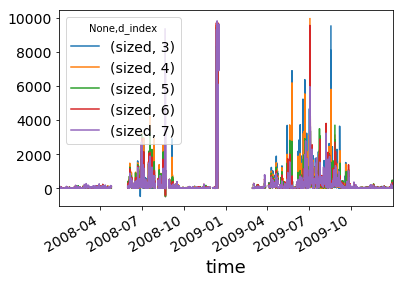

In [26]:
dd=df2.iloc[:,3:8]
mask = dd >10000
dd[mask] = np.nan
dd.plot()

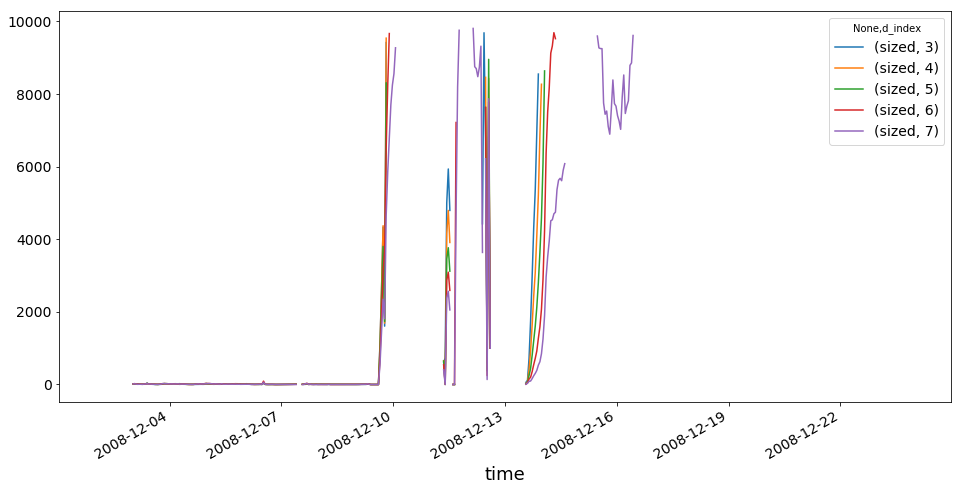

In [27]:
weird_subset = dd["2008-12-01":"2008-12-24"]
weird_subset.plot(figsize=(16, 8))

In [28]:
dd["2008-12-01":"2008-12-24"] = np.nan
dd

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(key, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

sized                                    
d_index                    3        4        5        6        7
time                                                            
2008-01-01 00:30:00  31.5800  41.5500  55.2200  54.8600  53.5100
2008-01-01 01:29:59  30.3500  60.7400  59.9100  67.7000  54.4200
2008-01-01 02:29:59  30.3100  46.0800  53.9100  49.5700  39.3200
2008-01-01 03:30:00  28.2900  43.4400  46.8900  36.3900  27.7400
2008-01-01 04:29:59  23.0600  40.5700  49.6600  50.2400  38.9000
...                      ...      ...      ...      ...      ...
2009-12-31 19:29:59  21.4955  31.5438  39.8348  33.1533  31.3493
2009-12-31 20:29:59  29.3215  38.1368  46.1363  46.1353  41.7918
2009-12-31 21:30:00  27.9227  39.5600  49.1788  48.4128  45.8600
2009-12-31 22:29:59  29.5557  38.5797  48.7317  50.8388  46.9193
2009-12-31 23:29:59  19.7590  33.5950  36.3043  33.3862  27.8952

[17520 rows x 5 columns]

In [29]:
dd_turned = dd.T.loc['sized']
dd_turned

time,2008-01-01 00:30:00,2008-01-01 01:29:59,2008-01-01 02:29:59,2008-01-01 03:30:00,2008-01-01 04:29:59,2008-01-01 05:29:59,2008-01-01 06:30:00,2008-01-01 07:29:59,2008-01-01 08:29:59,2008-01-01 09:30:00,...,2009-12-31 14:29:59,2009-12-31 15:30:00,2009-12-31 16:29:59,2009-12-31 17:29:59,2009-12-31 18:30:00,2009-12-31 19:29:59,2009-12-31 20:29:59,2009-12-31 21:30:00,2009-12-31 22:29:59,2009-12-31 23:29:59
d_index,,,,,,,,,,,,,,,,,,,,,
3,31.58,30.35,30.31,28.29,23.06,11.46,15.51,17.29,23.65,23.02,...,17.1017,26.5310,31.5585,20.7070,18.2515,21.4955,29.3215,27.9227,29.5557,19.7590
4,41.55,60.74,46.08,43.44,40.57,28.31,30.06,29.79,29.56,35.85,...,20.9430,31.8292,37.8327,27.7283,22.4985,31.5438,38.1368,39.5600,38.5797,33.5950
5,55.22,59.91,53.91,46.89,49.66,30.67,31.84,38.24,38.38,41.32,...,22.2800,40.5987,44.5713,30.5272,25.9353,39.8348,46.1363,49.1788,48.7317,36.3043
6,54.86,67.70,49.57,36.39,50.24,28.87,44.57,48.35,47.49,64.81,...,22.4247,35.7927,41.5355,24.1935,20.0657,33.1533,46.1353,48.4128,50.8388,33.3862
7,53.51,54.42,39.32,27.74,38.90,24.15,43.86,52.92,52.38,59.58,...,17.1488,31.7755,37.1112,19.0278,19.9512,31.3493,41.7918,45.8600,46.9193,27.8952


In [30]:
df_sizes_20_50_2008_2009 = dd_turned.loc[3:7,'2008-01-01 00:30:00':'2009-12-31 23:29:59'].T

Ntot_20_50_2008_2009 = pd.Series(np.trapz(df_sizes_20_50_2008_2009,
x = np.log10(df_sizes_20_50_2008_2009.columns)),
index=df_sizes_20_50_2008_2009.index.copy())

Ntot_20_50_2008_2009

time
2008-01-01 00:30:00    17.243023
2008-01-01 01:29:59    20.676362
2008-01-01 02:29:59    16.689339
2008-01-01 03:30:00    14.301624
2008-01-01 04:29:59    15.285943
                         ...    
2009-12-31 19:29:59    11.820747
2009-12-31 20:29:59    14.893840
2009-12-31 21:30:00    15.534784
2009-12-31 22:29:59    15.701403
2009-12-31 23:29:59    11.530349
Length: 17520, dtype: float64

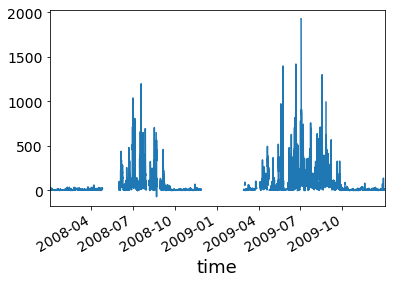

In [31]:
Ntot_20_50_2008_2009.plot()

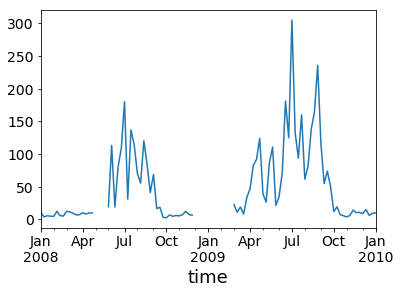

In [32]:
Ntot_20_50_2008_2009.resample('W').mean().plot()

## Reading CSV data from particle size distribution from Zeppelin 2010-2014

In [33]:
filenam1 = '/home/2daa7756-2d5725-2d4dfb-2db0ff-2d5e0a6858a009/shared-ns1000k/inputs//Aerosol_sizedist_obs/Zeppelin_2010_hourly.csv'
filenam2 = '/home/2daa7756-2d5725-2d4dfb-2db0ff-2d5e0a6858a009/shared-ns1000k/inputs//Aerosol_sizedist_obs/Zeppelin_2011_hourly.csv'
filenam3 = '/home/2daa7756-2d5725-2d4dfb-2db0ff-2d5e0a6858a009/shared-ns1000k/inputs//Aerosol_sizedist_obs/Zeppelin_2012_hourly.csv'
filenam4 = '/home/2daa7756-2d5725-2d4dfb-2db0ff-2d5e0a6858a009/shared-ns1000k/inputs//Aerosol_sizedist_obs/Zeppelin_2013_hourly.csv'
filenam5 = '/home/2daa7756-2d5725-2d4dfb-2db0ff-2d5e0a6858a009/shared-ns1000k/inputs//Aerosol_sizedist_obs/Zeppelin_2015_hourly.csv'

flist=[filenam1, filenam2, filenam3, filenam4, filenam5]
mydateparser = lambda x: pd.datetime.strptime(x, "%Y %m %d %H %M")
ldf = []
for f in flist:
    ldf.append(pd.read_csv(f, parse_dates=[['0','0.1','0.2','0.3','0.4']],date_parser = mydateparser)) 
data3 = pd.concat(ldf, axis=0)

data3.rename(columns={'0_0.1_0.2_0.3_0.4':'date'}, inplace = True)

In [34]:
data3 = data3.set_index('date')

In [35]:
 #remove last column
 data3.drop(labels='0.6', axis=1, inplace=True)  

In [36]:
#Vaihdetaan oikeesta datasta kaikki -999 arvot NaN
data3 = data3.replace(-999,np.nan)

In [37]:
data3.columns = [float(ii) for ii in data3.columns]
data3.columns

Float64Index([   0.5,   20.0,  22.44, 25.179, 28.251, 31.698, 35.566, 39.905,
              44.774, 50.238, 56.368, 63.246, 70.963, 79.621, 89.337, 100.24,
              112.47, 126.19, 141.59, 158.87, 178.25,  200.0,  224.4, 251.79,
              282.51, 316.98, 355.66, 399.05, 447.74, 502.38],
             dtype='float64')

In [38]:
new_d=data3.T

In [39]:
df_data_log = new_d.loc[20.0:50.238,'2010-01-01 00:00:00':'2013-08-28 08:00:00'].T
Ntot_20_50_2010_2014 = pd.Series(np.trapz(df_data_log,
x = np.log10(df_data_log.columns)),
index=df_data_log.index.copy())

Ntot_20_50_2010_2014

date
2010-01-01 00:00:00    12.314918
2010-01-01 01:00:00    10.592255
2010-01-01 02:00:00     9.255103
2010-01-01 03:00:00     9.234599
2010-01-01 04:00:00     9.807943
                         ...    
2013-08-28 04:00:00    17.198580
2013-08-28 05:00:00    20.952434
2013-08-28 06:00:00    28.014920
2013-08-28 07:00:00    34.483564
2013-08-28 08:00:00    45.884162
Length: 29207, dtype: float64

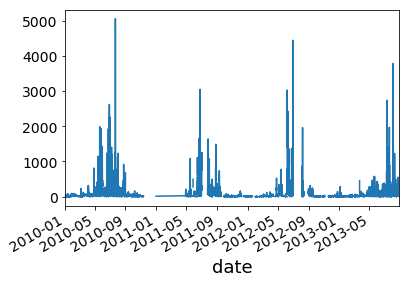

In [40]:
Ntot_20_50_2010_2014.plot()

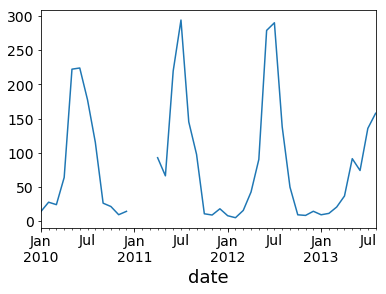

In [41]:
# lets take mean for every month or week or day and plot them together

Ntot_20_50_2010_2014.resample('M').mean().plot()

## Plotting wind direction from Zeppelin 2000-2013

In [42]:
ls ebas_winddir/

NO0042G.20000101000000.20120101000000.aws.wind_direction.met.1y.1h.NO01L_NO42_aws_10m.NO01L_wind_vane..nas
NO0042G.20010101000000.20120101000000.aws.wind_direction.met.1y.1h.NO01L_NO42_aws_10m.NO01L_wind_vane..nas
NO0042G.20020101000000.20120101000000.aws.wind_direction.met.1y.1h.NO01L_NO42_aws_10m.NO01L_wind_vane..nas
NO0042G.20030101000000.20120101000000.aws.wind_direction.met.1y.1h.NO01L_NO42_aws_10m.NO01L_wind_vane..nas
NO0042G.20040101000000.20120101000000.aws.wind_direction.met.1y.1h.NO01L_NO42_aws_10m.NO01L_wind_vane..nas
NO0042G.20050101000000.20120101000000.aws.wind_direction.met.1y.1h.NO01L_NO42_aws_10m.NO01L_wind_vane..nas
NO0042G.20060101000000.20120101000000.aws.wind_direction.met.1y.1h.NO01L_NO42_aws_10m.NO01L_wind_vane..nas
NO0042G.20070101000000.20120101000000.aws.wind_direction.met.1y.1h.NO01L_NO42_aws_10m.NO01L_wind_vane..nas
NO0042G.20080101000000.20120101000000.aws.wind_direction.met.1y.1h.NO01L_NO42_aws_10m.NO01L_wind_vane..nas
NO0042G.20090101000000.20120101000000

In [43]:
fpath4 = 'ebas_winddir/'+'NO0042G.20000101000000.20120101000000.aws.wind_direction.met.1y.1h.NO01L_NO42_aws_10m.NO01L_wind_vane..nas'

In [44]:
filedata4 = pya.io.EbasNasaAmesFile(fpath4)
print(filedata4)

Pyaerocom EbasNasaAmesFile
--------------------------

num_head_lines: 52
num_head_fmt: 1001
data_originator: Aas, Wenche
sponsor_organisation: NO01L, Norwegian Institute for Air Research, NILU, Atmosphere and Climate Department, Instituttveien 18, , 2007, Kjeller, Norway
submitter: Hjellbrekke, Anne
project_association: EMEP NILU
vol_num: 1
vol_totnum: 1
ref_date: 2000-01-01T00:00:00
revision_date: 2012-01-01T00:00:00
freq: 0.0
descr_time_unit: days from file reference point
num_cols_dependent: 3
mul_factors (list, 3 items): ['1.00', '1.00', '1.00']
vals_invalid (list, 3 items): ['1000', 9999.0, '10.00']
descr_first_col: end_time of measurement, days from the file reference point

   Column variable definitions
   -------------------------------
   EbasColDef: name=starttime, unit=days, is_var=False, is_flag=False, flag_col=3, 
   EbasColDef: name=endtime, unit=days, is_var=False, is_flag=False, flag_col=3, 
   EbasColDef: name=wind_direction, unit=deg, is_var=True, is_flag=False, fla

In [45]:
df4 = filedata4.to_dataframe()

In [46]:
winddir = []
for filepath4 in glob.glob('ebas_winddir/*.nas'):
    filedata4 = pya.io.EbasNasaAmesFile(filepath4)
    winddir.append(filedata4.to_dataframe().wind_direction_deg)

In [47]:
wind_timeseries_first = winddir[0]

In [48]:
all_wind = winddir[0]
for data in winddir[1:]:
    all_wind = pd.concat([all_wind, data], axis=0)
all_wind.sort_index(inplace=True)

In [49]:
all_wind_avg = all_wind.resample('H').mean()
all_wind_avg

2000-01-01 00:00:00      NaN
2000-01-01 01:00:00      NaN
2000-01-01 02:00:00    105.0
2000-01-01 03:00:00    119.0
2000-01-01 04:00:00    103.0
                       ...  
2013-08-28 04:00:00    169.0
2013-08-28 05:00:00    168.0
2013-08-28 06:00:00    172.0
2013-08-28 07:00:00    170.0
2013-08-28 08:00:00    171.0
Freq: H, Name: wind_direction_deg, Length: 119721, dtype: float64

In [50]:
filter_mask = all_wind_avg.between(260, 350) #corresponds to average of 112.5
filter_mask

March_index = filter_mask.index > pd.to_datetime('2000-03-01 00:00:00') 

new_filter = filter_mask[March_index]

In [51]:
#filter_mask

## Plot timeseries together

In [52]:
#Ntot_20_50_2000_2007.plot()
#Ntot_20_50_2008_2009.plot()
#Ntot_20_50_2010_2014.plot()

In [53]:
part1 = Ntot_20_50_2000_2007.resample('H').mean()
part2 = Ntot_20_50_2008_2009.resample('H').mean()
part3 = Ntot_20_50_2010_2014

frames = [part1,part2,part3]
Ntot_20_50_ALL = pd.concat(frames)

Ntot_20_50_ALL

2000-03-01 00:00:00          NaN
2000-03-01 01:00:00          NaN
2000-03-01 02:00:00          NaN
2000-03-01 03:00:00          NaN
2000-03-01 04:00:00          NaN
                         ...    
2013-08-28 04:00:00    17.198580
2013-08-28 05:00:00    20.952434
2013-08-28 06:00:00    28.014920
2013-08-28 07:00:00    34.483564
2013-08-28 08:00:00    45.884162
Length: 115435, dtype: float64

In [54]:
#Ntot_20_50_2000_2007.resample('M').mean().plot()
#Ntot_20_50_2008_2009.resample('M').mean().plot()
#Ntot_20_50_2010_2014.resample('M').mean().plot()



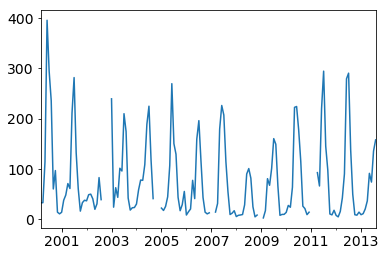

In [55]:
Ntot_20_50_ALL.resample('M').mean().plot()

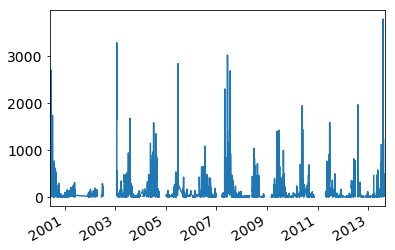

In [56]:
# averaging over the whole wind dataframe (all_wind). 
# Using only westerly and north-westerly winds, so not caring about wrong average over 360 and 0 degrees


interp_mask = np.interp(Ntot_20_50_ALL.index,new_filter.index,new_filter.values)
west_filter = interp_mask > 0
west_filter

other_dir_filter = interp_mask == 0

Ntot_20_50_ALL[west_filter].plot()

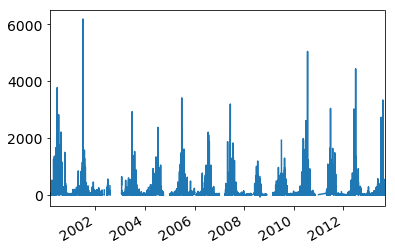

In [57]:
Ntot_20_50_ALL[other_dir_filter].plot()

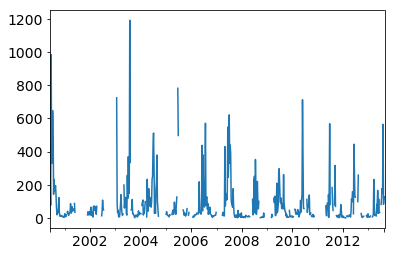

In [58]:
Ntot_20_50_ALL[west_filter].resample('W').mean().plot()

Text(0.5,47,'Date')

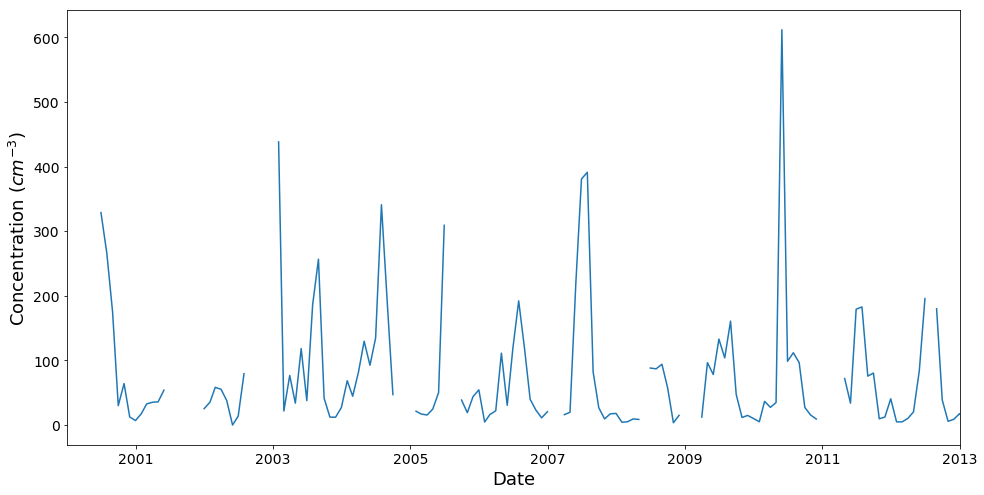

In [67]:
plt.figure(1,figsize=[16,8])
plt.plot(Ntot_20_50_ALL[west_filter].resample('M').mean())
plt.savefig('particle_cons_month_mean_westwind.png')
plt.xlim('2000','2013')
plt.ylabel('Concentration ($cm^{-3}$)')
plt.xlabel('Date')

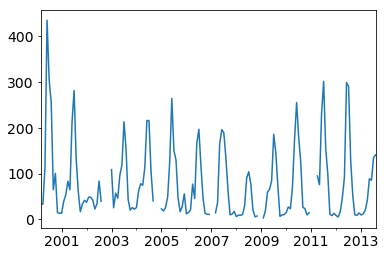

In [60]:
Ntot_20_50_ALL[other_dir_filter].resample('M').mean().plot()

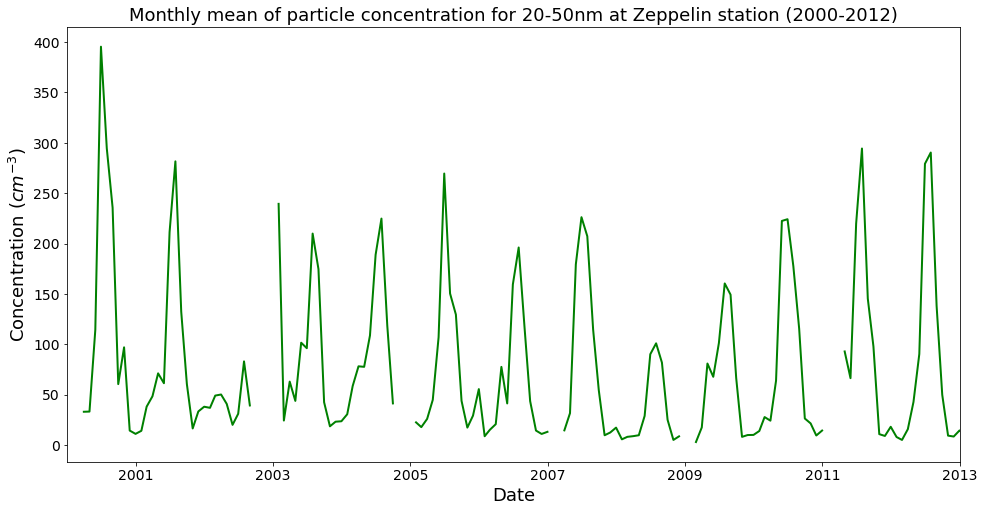

In [66]:
plt.figure(1,figsize=[16,8])
plt.plot(Ntot_20_50_ALL.resample('M').mean(),color='g', linewidth = 2)
plt.xlim('2000','2013')
plt.xlabel('Date')
plt.ylabel('Concentration ($cm^{-3}$)')
plt.title('Monthly mean of particle concentration for 20-50nm at Zeppelin station (2000-2012)')
plt.savefig('particle_cons_month_mean.png')